# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [6]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [7]:
data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

# Check whether class imbalance exists.

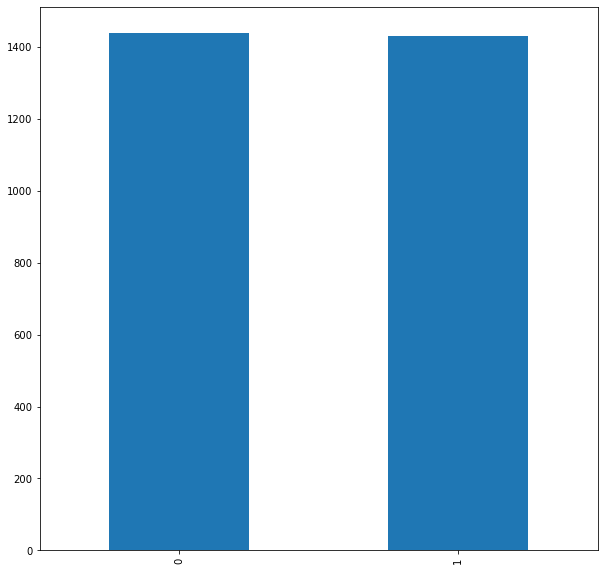

In [8]:
data["yearly_availability"].value_counts().plot.bar(figsize = (10,10))

### Since the data has no class imbalance, there is no need of undersampling or oversampling.

# We find the correlation matrix and visualize it as a heatmap to check whether any features are significantly correlated.

Text(0.5, 1, 'Correlation between features.')

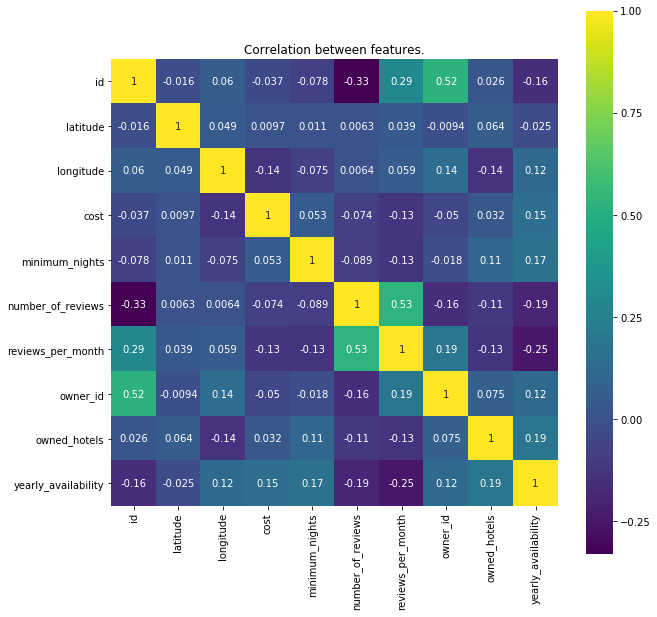

In [9]:
correlation = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title("Correlation between features.")

### Since there is no significant correlation between any features, we don't need to drop any features.

### There are 676 rows with NaN values in the 'reviews_per_month' column. There are a couple of ways to deal with this, the most common way being removal of these rows. However, given our dataset, 676 rows are a significant portion of our data and deleting these rows would lead to loss of useful information. We will handle these missing values in the preprocessing functions

In [10]:
data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [11]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()
test_ids = test_data["id"]

In [12]:
test_data.isna().sum()

id                      0
region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owner_id                0
owned_hotels            0
dtype: int64

# We will use PCA to reduce dimensionality of the dataset and to keep only the most useful and important features in the data.

In [13]:
lbe = LabelEncoder()

# All required functions to clean and preprocess the data. These functions will get the data ready to be fed into the model for training and predictions.

In [14]:

# We have to convert categorical data into numeric data. We do this by using sklearn's 
# Label Encoder.
def label_encode(data):
    data["location"] = lbe.fit_transform(data["region"])
    data["type"] = lbe.fit_transform(data["accommodation_type"])
    return data


#We remove the 'id' and 'owner_id' columns as they don't provide any useful information in hotel availability. 
#We also remor the 'region' and 'accomodation_type' columns as we already replaced them with 'location' and 'type' respectively.
def remove_columns(data):
    data = data.drop(["region", "accommodation_type"], axis = 1)
    data = data.drop(["id","owner_id"], axis = 1)
    return data


# Replace the NaN values in the 'reviews_per_month' column by the mean of the column values.
# We do this because removing the 676 rows from the data containing NaN values will lead to 
# loss of useful information for training.
def fillNaN(data):
    data["reviews_per_month"] = data["reviews_per_month"].fillna(np.mean(data["reviews_per_month"]))
    return data

In [15]:
data = fillNaN(data)
data = label_encode(data)
data = remove_columns(data)

test_data = fillNaN(test_data)
test_data = label_encode(test_data)
test_data = remove_columns(test_data)



X = data.drop("yearly_availability",axis = 1)
y = data["yearly_availability"]

# Create an instance of SVM. I chose SVM because it is good at generating boundaries to differentiate classes in classification problems. In our case, where we need to predict either a 0 or a 1, SVM can perform much better.

In [16]:
svm = SVC()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 5)
svm.fit(X_train, y_train)
preds = svm.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Accuracy of the model

In [18]:
accuracy = accuracy_score(y_test, preds)*100
formatted_accuracy = "{:.2f}".format(accuracy)
accuracy_str = str(formatted_accuracy) + "%"
print("Accuracy: ",accuracy_str)

Accuracy:  69.64%


# Confusion Matrix

In [19]:
confusion_matrix(y_test, preds)

array([[220, 133],
       [ 85, 280]])

### In the confusion matrix above, we can see that-

### 1. True Positives = 220
### 2. True Negatives = 280
### 3. False Positives = 133
### 4. False Negatives = 85


From the numbers above, we can see that our model can correctly predict 0's and 1's to a fairly good extent. However, it is still getting 30% of the predictions wrong. This can further be improved by adding more data to our dataset, having a variety of data, increased support for low-support regions, etc.

# Looking at Precision, recall and f1 scores.

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       353
           1       0.68      0.77      0.72       365

    accuracy                           0.70       718
   macro avg       0.70      0.70      0.69       718
weighted avg       0.70      0.70      0.69       718



Precision for target classes are 0.72 and 0.68 for 0 and 1 respectively, which we not excellent but fairly good. This means that our model is getting 72% of the predictions right for class 0, and 68% predictions right for class '1'.

Recall for class 1 is pretty good, which means the model isn't missing a whole lot of data, but for class 0, the recall score can be much better.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [21]:
test_preds = svm.predict(test_data)
final_data = {"id":test_ids, "yearly_availability": test_preds}
submission_df = pd.DataFrame(final_data)

In [22]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---